by wedad\
Hey team this file contains the optimisation for Decision Tree Optimzation and experimentations\
I'll be comparing them to the baseline model found in baseline_model.ipynb\
The columns dropped are selected from '4_FeatureEngineeringRegression' file

# Decision Tree Optimisation
Approaches I took were feature selection, Hyperparam tuning, Different Tree Model testing\
And Ensemble of different models\
Overall the best performing model was the Ensemble with reduced feature set, as see below:
--------------------------------------------



Read in all the relevant Libraries


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
import warnings
warnings.filterwarnings('ignore')

In [9]:
seed_list = [1,2,3,4,5,6,7,8,9,10]

In [10]:
aki_df = pd.read_csv('../../data/df_final_AKI.csv')
aki_df = aki_df.drop(columns=['Unnamed: 0', 'subject_id'])
aki_df

,dod,gender,age,Albumin,Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Respiratory Rate,hypertension,chronic_kidney_disease,sepsis,Intercept
0,0,1,73,3.6,1.2,9.4,3.2,13.8,138.0,16.0,48.0,101.0,84.0,20.0,1,0,0,1
1,0,0,24,4.1,0.5,10.2,1.2,15.7,143.0,6.0,56.0,114.0,59.0,16.0,0,0,0,1
2,0,0,54,4.1,0.4,10.2,1.0,14.4,142.0,22.0,48.0,130.0,59.0,24.0,1,0,0,1
3,0,1,84,3.5,1.1,10.2,1.6,18.7,144.0,17.0,56.0,114.0,89.0,21.0,1,0,0,1
4,0,0,59,3.6,0.6,10.2,1.7,12.4,153.0,8.0,70.0,91.0,99.0,21.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,0,1,61,3.3,3.6,10.2,1.5,13.1,138.0,23.0,62.0,103.0,89.0,20.0,0,1,0,1
9805,0,1,74,3.5,0.6,10.2,1.2,13.6,138.0,6.0,56.0,114.0,107.0,22.0,1,0,0,1
9806,0,1,58,4.1,0.6,10.2,0.9,9.3,141.0,8.0,56.0,114.0,78.0,10.0,0,0,0,1
9807,1,1,84,4.0,3.4,12.2,1.1,17.9,141.0,88.0,56.0,114.0,101.0,25.0,1,1,0,1


In [11]:
model_desc = []
model_comparison_DF = pd.DataFrame(model_desc, columns=['model', 'accuracy', 'precision', 'recall', 'F1 score'])
model_comparison_DF

,model,accuracy,precision,recall,F1 score


### Baseline model

In [12]:
x = aki_df.drop(columns=['dod'])
y = aki_df['dod']

def TreeTester(model_desc, model, x, y, title='Tree', printer=False):
    total_acc = 0
    total_pre = 0
    total_rec = 0
    total_f1 = 0
    total = len(seed_list)
    for rand in seed_list:
        x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.25, random_state=rand)
        model.fit(x_train, y_train)
        y_pred_log = model.predict(x_test)
        total_acc += accuracy_score(y_test, y_pred_log)
        total_pre += precision_score(y_test, y_pred_log)
        total_rec += recall_score(y_test, y_pred_log)
        total_f1 += f1_score(y_test, y_pred_log)

    model_desc.append([
        title,
        total_acc/total,
        total_pre/total,
        total_rec/total,
        total_f1/total
        
                      ])
    if printer:
        # Evaluate
        print(f"{title}")
        print('--------------------------------------------')
        print("Accuracy:", total_acc/total,)
        print("Precision: ", total_pre/total,)
        print("recall: ", total_rec/total,)
        print("f1_score: ", total_f1/total,)
        print('--------------------------------------------')
        # tree.plot_tree(model)
        # print("Classification Report:\n", classification_report(y_test, y_pred_bin))
        plt.show()


Baseline model for Decision Tree
Decision Tree baseline
--------------------------------------------
Accuracy: 0.7750509580105993
Precision:  0.3437798792161846
recall:  0.36265060240963853
f1_score:  0.3528957001206722
--------------------------------------------


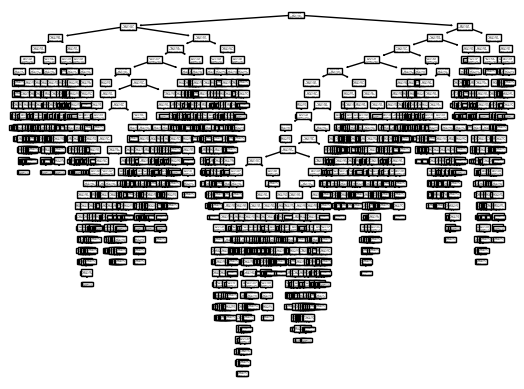

In [13]:
dTree = DecisionTreeClassifier()
print("Baseline model for Decision Tree")
TreeTester(model_desc, dTree, x, y,'Decision Tree baseline', True)

In [7]:
x = aki_df.drop(columns=['dod','Sodium','Hemoglobin','gender','hypertension','Intercept'])
y = aki_df['dod']

print("Modified Feature Baseline model for Decision Tree")
TreeTester(model_desc, dTree, x, y,'Decision Tree reduced-feature baseline', True)

Modified Feature Baseline model for Decision Tree
Decision Tree reduced-feature baseline
--------------------------------------------
Accuracy: 0.7752547900529964
Precision:  0.34790746373563497
recall:  0.37686746987951814
f1_score:  0.36167639081995306
--------------------------------------------


### Tuning